In [5]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [74]:
# Load the data set
df = pd.read_csv("loan_data_set.csv")

In [75]:
df.head() #Show first five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [77]:
#check for null values in the data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
# Filling the null values with mode if column is category, and mean if column is numerical. 
df.fillna({'Gender':df.Gender.mode()[0], 'Married': df.Married.mode()[0], 'Dependents':df.Dependents.mode()[0], 
          'Self_Employed':df.Self_Employed.mode()[0], 'Loan_Amount_Term':df.Dependents.mode()[0], 
           'Credit_History':df.Self_Employed.mode()[0], 'LoanAmount':df.LoanAmount.mean() }, inplace=True)

In [79]:
# Checking to ensure no more null values in the data
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
df.duplicated().sum() #Checking for duplicate rows

0

### EDA

In [81]:
# function to change columns with (Yes/No & Y/N) to 1/0
def yes_no(a_column):
    if a_column.str.contains('Yes').any():
        return a_column.map({'Yes': 1, 'No': 0})
    else:
        return a_column.map({'Y': 1, 'N': 0})

In [82]:
# apply the yes_no() to the columns with .apply()
df[['Married', 'Self_Employed', 'Loan_Status']] = df[['Married', 'Self_Employed', 'Loan_Status']].apply(yes_no)

In [83]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


<AxesSubplot:>

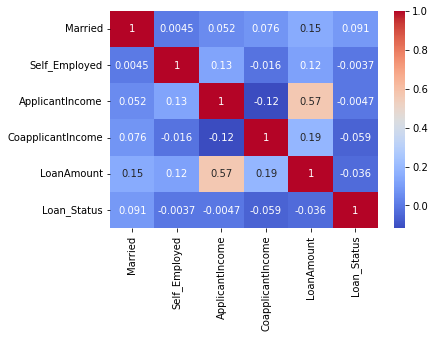

In [84]:
# correlation heatmap of the data set
sb.heatmap(df.corr() , cmap = "coolwarm", annot=True)

All the numerical columns has very weak correlation with the target column(Loan_Status)

array([[<AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>],
       [<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>]], dtype=object)

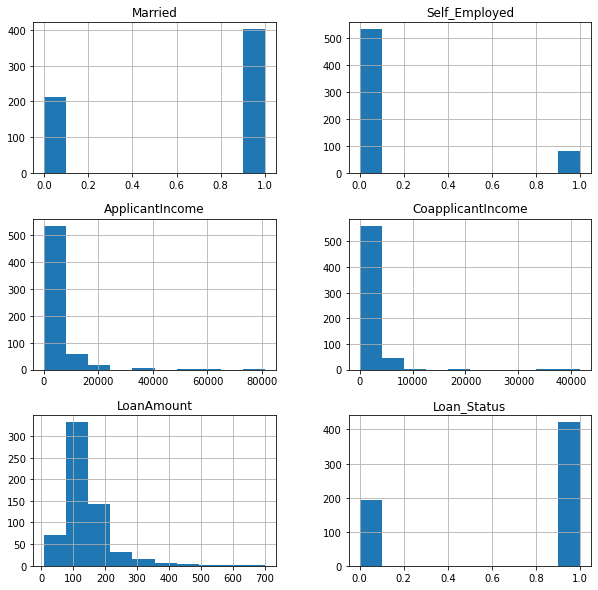

In [85]:
# Checking for skewness in the data
df.hist(figsize=(10,10))

In [103]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [104]:
def skew_function():
    
    """ I want to pull out all the skewed columns in the dataframe"""
    
    skew_value = []
    
    for col in df.select_dtypes('number'):
        skew_col = df[col].skew()
        skew_value.append((col , skew_col))
    return sorted(skew_value , key = lambda x : x[1] , reverse = True)

In [105]:
skew_function()

[('LoanAmount', 2.726601144105299),
 ('Self_Employed', 2.159796196971883),
 ('ApplicantIncome', 0.4821279953732817),
 ('CoapplicantIncome', -0.17307327599230946),
 ('Married', -0.6448502342244192)]

In [107]:
skewed_cols = ['CoapplicantIncome', 'ApplicantIncome']
numerical_cols = list(df.select_dtypes('number').columns)

#### Remove target variable from the DataFrame

In [ ]:
loan_label = df["Loan_Status"]
raw_df = df.copy()
df.drop("Loan_Status" , axis = 1 , inplace = True)

### Data Preprocessing

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
# transforming skewness in the skewed columns 
# Also, Standardizing the numerical columns
df[skewed_cols] = np.log(df[skewed_cols] + 1)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Transform categorical columns

In [115]:
df = pd.get_dummies(df)

In [116]:
df.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_0,Credit_History_0.0,Credit_History_1.0,Credit_History_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.372089,-0.392601,0.542519,-1.115677,0.000000,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0.728816,-0.392601,0.171778,0.852149,-0.219273,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0.728816,2.547117,-0.495635,-1.115677,-0.957641,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0.728816,-0.392601,-0.738863,0.900741,-0.314547,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,-1.372089,-0.392601,0.580721,-1.115677,-0.064454,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


### Spliting Data into Training and Testing

In [117]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df, loan_label, test_size=.2, random_state=True)

In [119]:
X_test.shape

(123, 644)

### Model training on the data set

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [121]:
# creating an instance of each models
model_1 = LogisticRegression()
#model_1.fit(X_train, y_train)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()

In [122]:
# Model evaluation function
def eval(Model):
    Model = Model.fit(X_train , y_train)
    Model_predict_train = Model.predict(X_train)
    Model_predict_test = Model.predict(X_test)
    
    accuracy_score_train = accuracy_score(Model_predict_train , y_train)
    accuracy_score_test = accuracy_score(Model_predict_test , y_test)
    
    print (f"The model has an accuracy score of {accuracy_score_train} on training and {accuracy_score_test} on testing.")

In [123]:
eval(model_1)

The model has an accuracy score of 0.8370672097759674 on training and 0.7967479674796748 on testing.


In [124]:
eval(model_2)

The model has an accuracy score of 1.0 on training and 0.7642276422764228 on testing.


In [125]:
eval(model_3)

The model has an accuracy score of 1.0 on training and 0.7967479674796748 on testing.


model_1(LogisticRegression) with 0.835 accuracy on training data and 0.797 on testing data is the most optimized model. 
While the other two resulted to over fitting

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [143]:
cross_val_score(model_1 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.79878049, 0.82317073, 0.80368098])

In [144]:
cross_val_score(model_2, X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.76829268, 0.73780488, 0.80368098])

In [151]:
cross_val_score(model_3, X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.79268293, 0.82926829, 0.80368098])

In [1]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
y_predict = model_1.predict(X_test)
print(classification_report(y_test, y_predict)) #print classification report

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



We got 80 % accuracy on model_1(Logistic Regression)

In [150]:
confusion_matrix(y_test, y_predict)

array([[16, 23],
       [ 2, 82]], dtype=int64)

### Hyperparameter Tuning

In [130]:
model_1

LogisticRegression()

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
grid_param = {'penalty':['l1','l2'], 'C': np.logspace(-3,3,7), 'solver':['newton-cg', 'lbfgs', 'liblinear'],}

In [134]:
Grid_model = GridSearchCV(model_1, param_grid=grid_param, scoring="accuracy", cv=10)

In [135]:
Grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [136]:
print("Tuned Hyperparameters :", Grid_model.best_params_)
print("Accuracy :", Grid_model.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8147755102040817


Our model performace has been optimized from 0.79 to 0.81

In [153]:
grid_predictions = Grid_model.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [152]:
confusion_matrix(y_test, grid_predictions)

array([[16, 23],
       [ 2, 82]], dtype=int64)